In [1]:
from detectron2.data import DatasetCatalog,MetadataCatalog
from plain_train_net import grab_dataset,OutputVis
import os
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
plt.style.use('ybpres.mplstyle')
import pandas as pd



In [2]:
dataset_name = "dfsemisup_long_fold1"
DatasetCatalog.register(dataset_name, grab_dataset(dataset_name))
MetadataCatalog.get(dataset_name).thing_classes = [""]
vis =OutputVis(dataset_name,pred_mode='file',pred_file = 'output_dfsemisup_long_fold1/fold5/coco_instances_results.json',has_annotations=False)


In [2]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.8.0
ipywidgets       : 7.6.5
jupyter_client   : 7.1.2
jupyter_core     : 4.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.11
nbconvert        : 6.3.0
nbformat         : 5.1.3
notebook         : 6.4.8
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
dfpts = pd.read_csv('/data/amd-data/cera-rpd/detectron2-rpd/output_dfsemisup_long_fold1/fold5/dfpts.csv')[['volID','dt_instances']]
dfimg = pd.read_csv('/data/amd-data/cera-rpd/detectron2-rpd/output_dfsemisup_long_fold1/fold5/dfimg.csv',index_col=0)[['volID','scan']].reset_index()
dfdata = pd.read_parquet('/data/amd-data/cera-rpd/detectron2-rpd/datasets/dfsemisup_long_refined.parquet')
dfdata = dfdata[dfdata.fold=='fold1'][['ptid','eye','age','instance','octh','slicei']]
dfinstances = dfdata[['ptid','eye','age','instance']].drop_duplicates().merge(dfpts,left_on='instance',right_on='volID').drop(columns=['instance'])
dfdata = dfimg.merge(dfdata,left_on=['volID','scan'],right_on=['instance','slicei']).set_index('index').drop(columns=['instance','slicei'])

In [20]:
eye_grps = dfdata.groupby(['ptid','eye'])
ptid = '055bdc3ae92212dd5daa3a66358d58283ce6e60dc8c8d9f8efe83cd3005fb449'
grps_L = eye_grps.get_group((ptid,'L')).groupby('age')
grps_R = eye_grps.get_group((ptid,'R')).groupby('age')

In [5]:
import enface_library
irpaths_L = enface_library.get_irpaths(vis,grps_L)

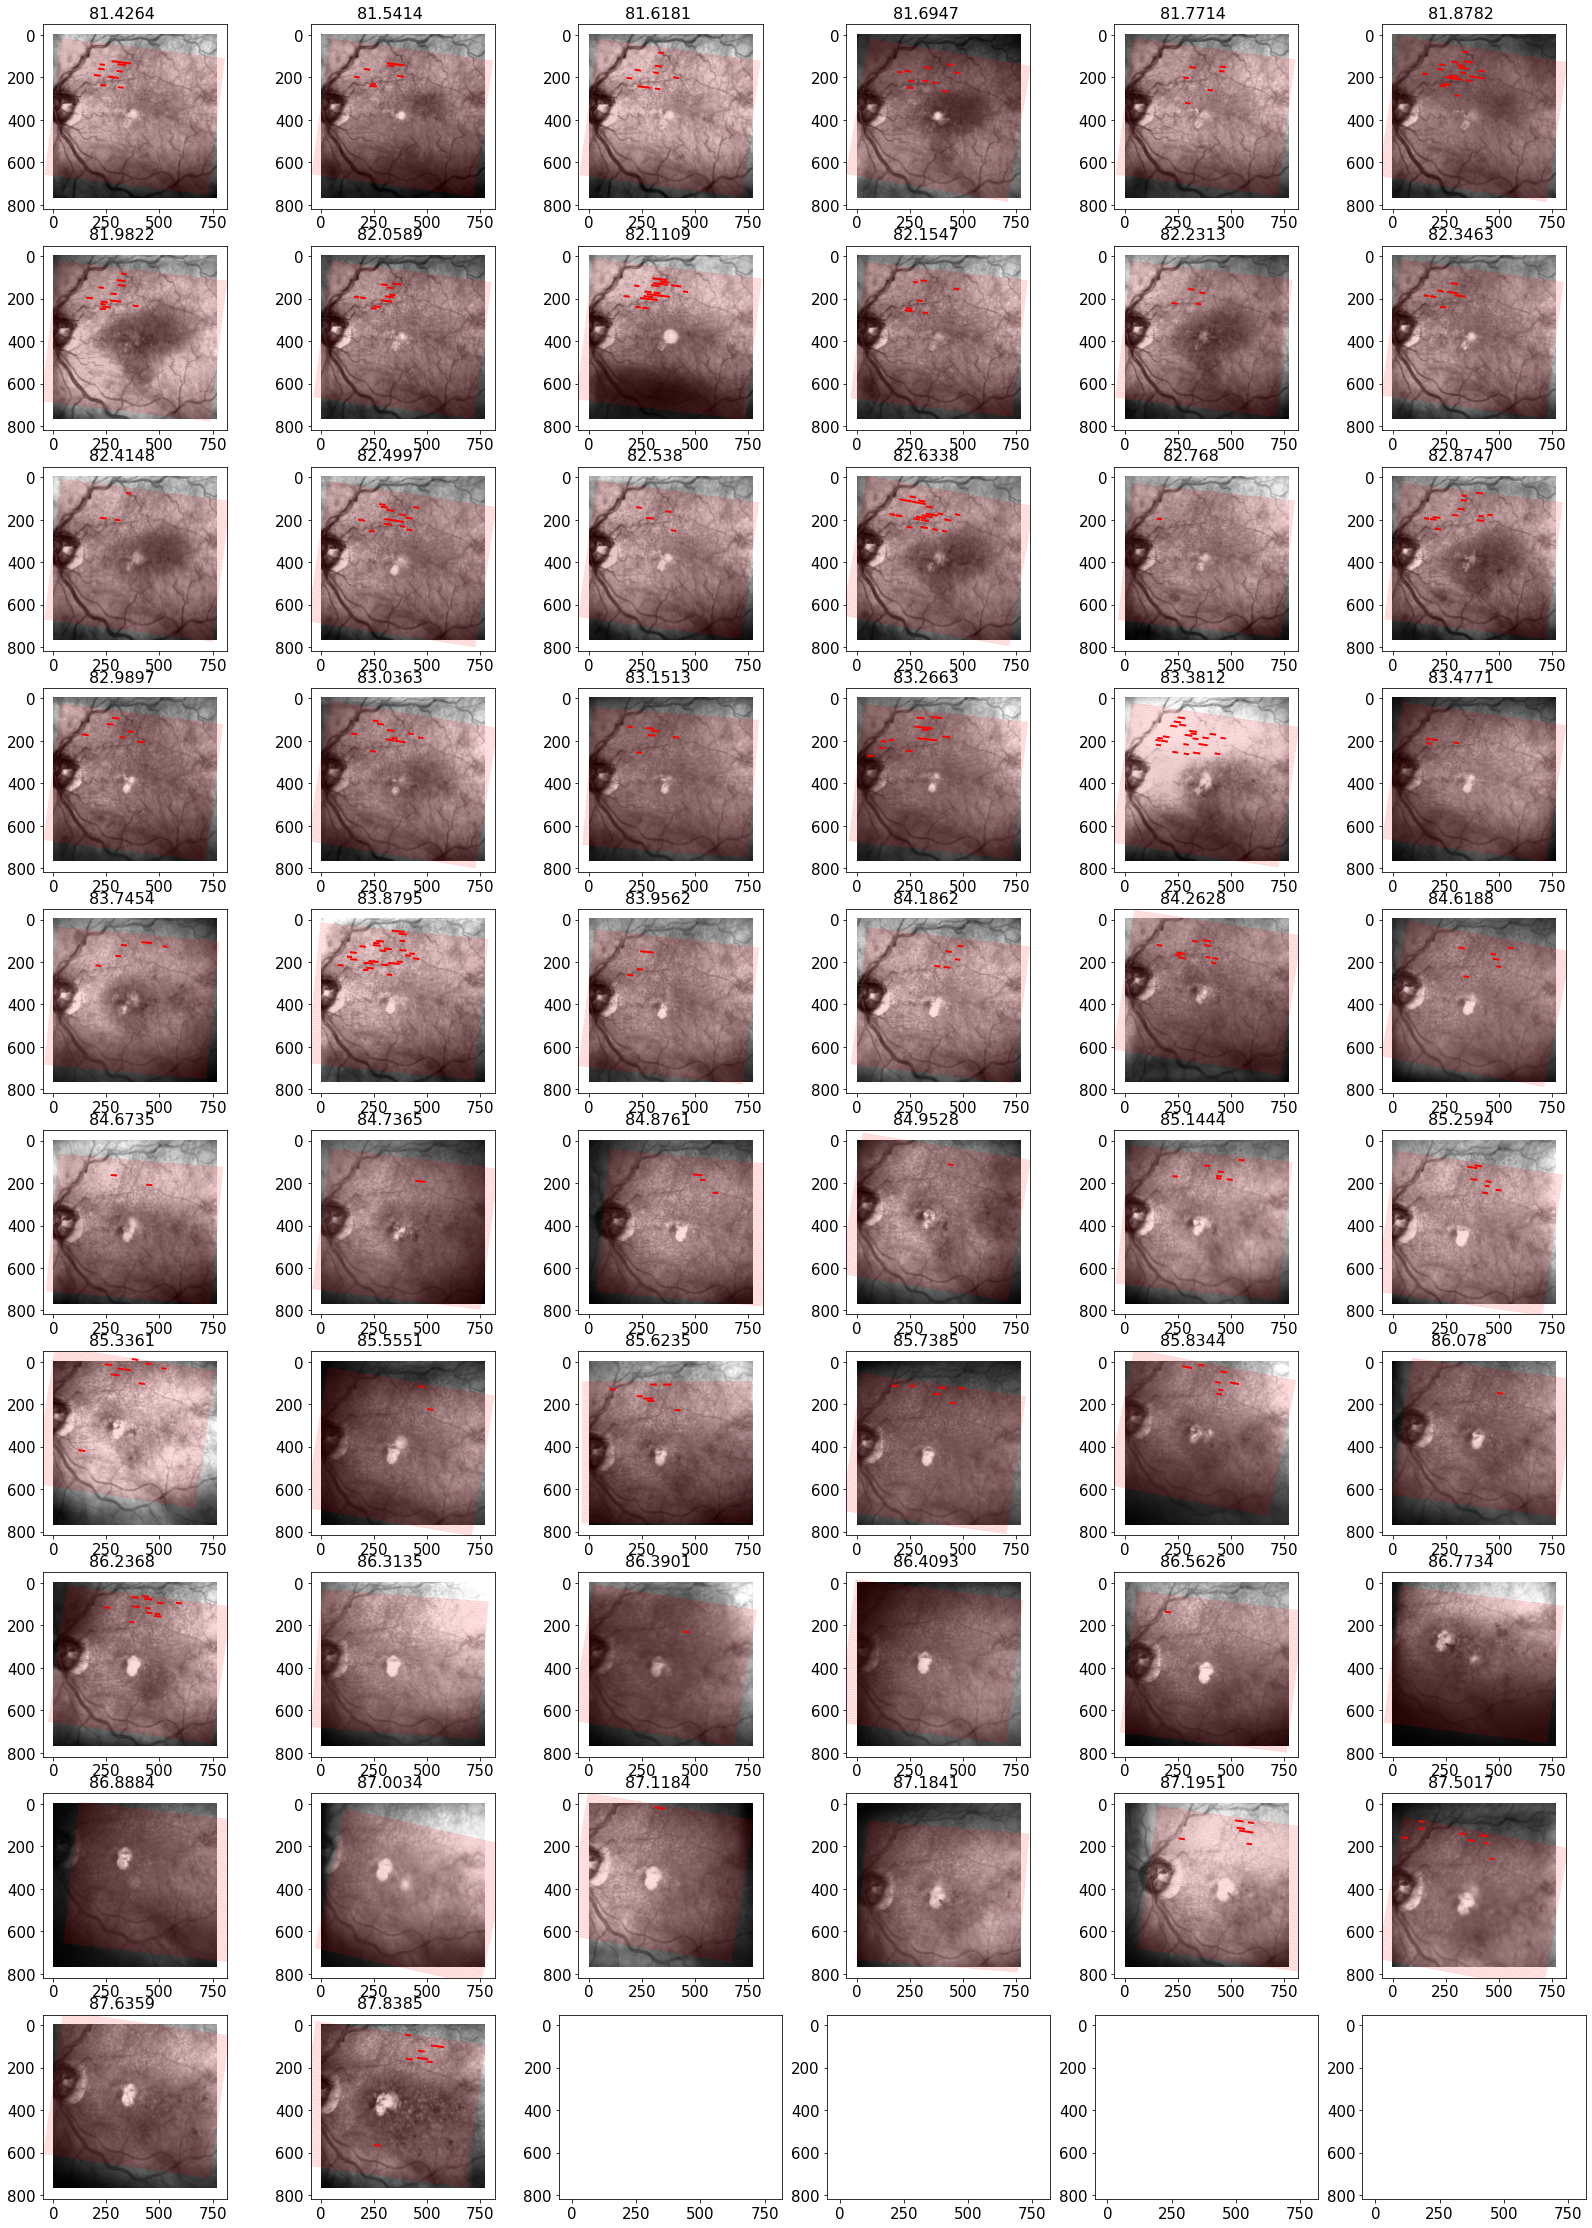

In [13]:
fig,axs = plt.subplots(10,6,figsize=[28,40])
scan_height=496
scan_width=768
plt.setp(axs,xlim=(-50,scan_width+50),ylim=(scan_width+50,-50))
enface_library.draw_ir(vis,irpaths_L,grps_L,scan_height,scan_width,fig=fig,affine_transforms=None)

Text(0, 0.5, 'RPD in volume')

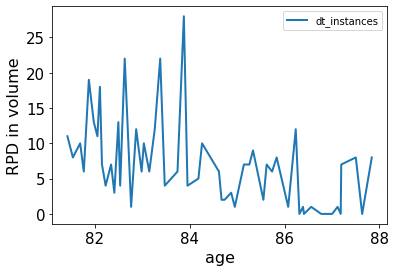

In [78]:
# grps_L.get_group(87.6359)
dfinst = dfinstances[(dfinstances.ptid==ptid)&(dfinstances.eye=='L')].sort_values(by='age')
dfinst.plot(x='age',y='dt_instances')
plt.ylabel('RPD in volume')

In [60]:
# from PIL import Image,ImageStat
import cv2
mu_dict = {}
for name,grp in grps_L:
    imgids = grp.index.values
    mu = np.empty(len(imgids))
    for i,imgid in enumerate(imgids):       
        dat = vis.get_gt_image_data(imgid)
        im = cv2.imread(dat['file_name'])
        mu[i] = im.std()
    mu_dict[name] = mu.mean()
    


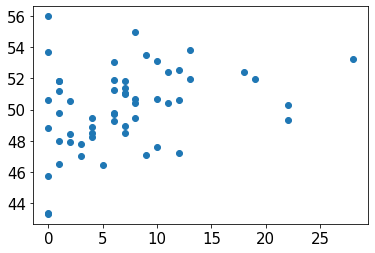

In [70]:
plt.scatter(dfinst.dt_instances,mu_dict.values())

In [ ]:
# vis.output_pred_to_tiff(grps_L.get_group(82.768).index,'output_dfsemisup_long_fold1/fold5/055bdc3_L_82p768.tiff');
vis.output_pred_to_tiff(grps_L.get_group(82.1109).index,'output_dfsemisup_long_fold1/fold5/055bdc3_L_82p1109.tiff');

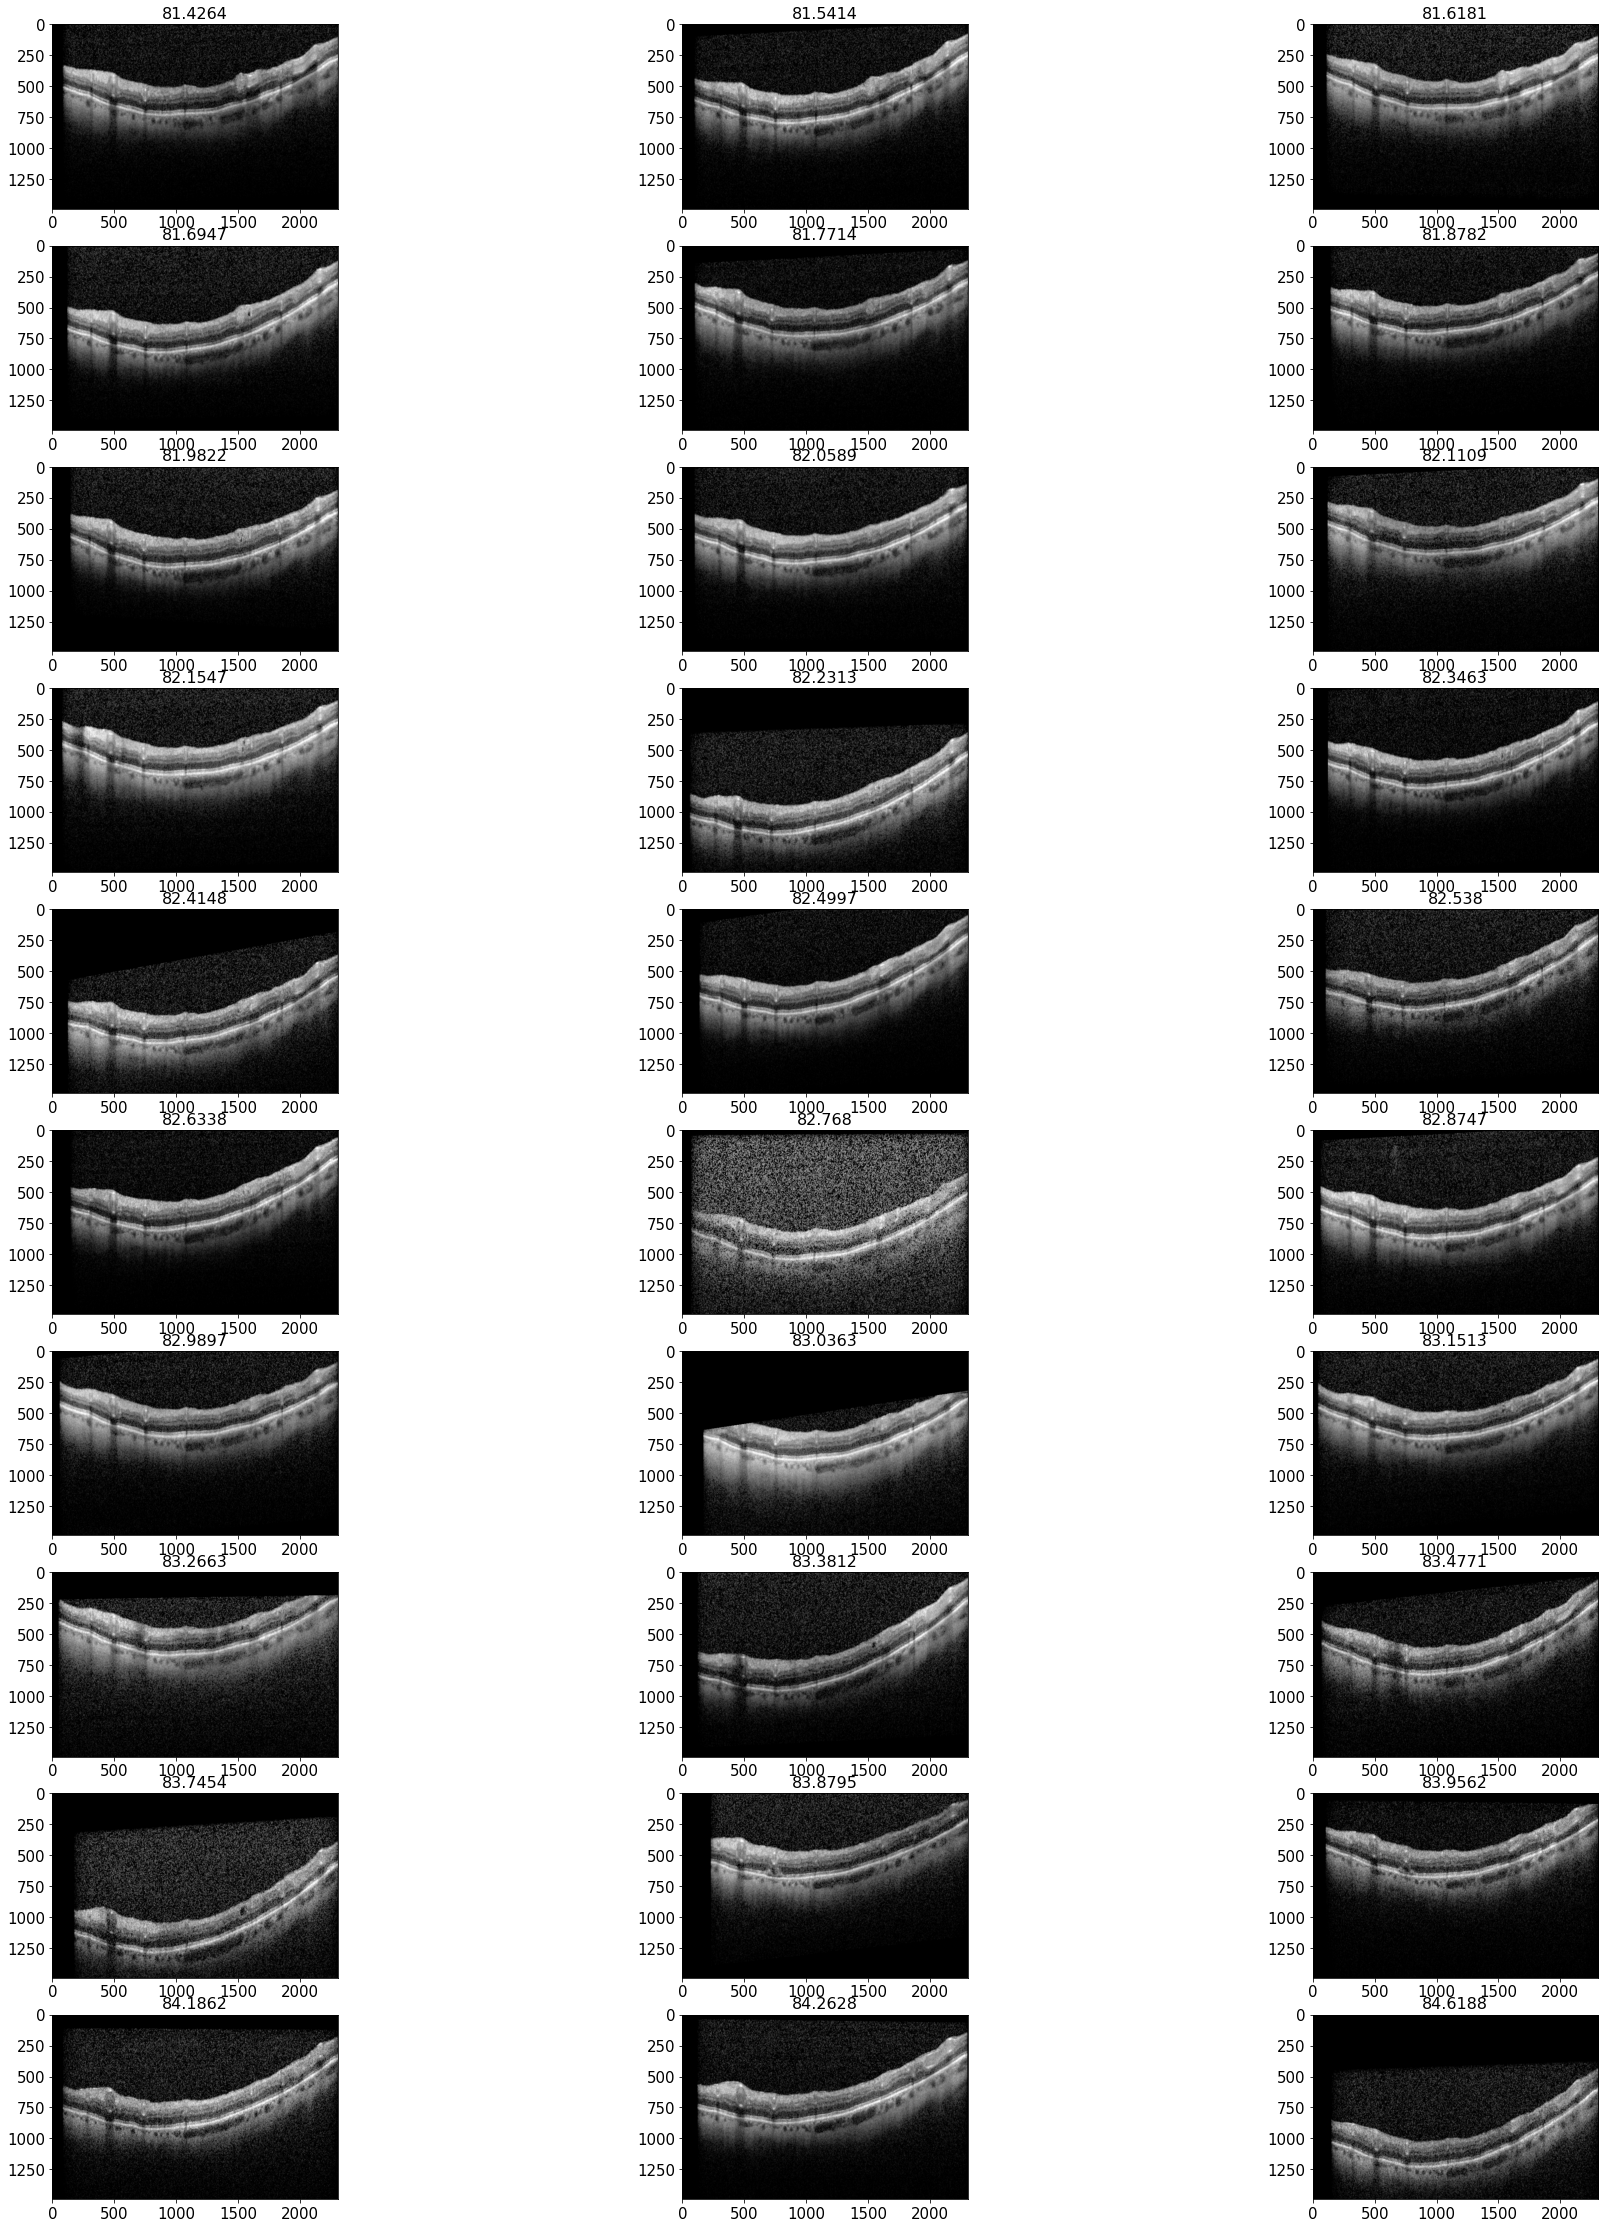

In [75]:
fig,_ = plt.subplots(10,3,figsize=[32,40])
for ax,(name,grp) in zip(fig.axes, grps_L):
    imgid = grp.index.values[53]
    _,img_model = vis.get_image(imgid)
    ax.imshow(np.array(img_model))
    ax.set_title(str(name))

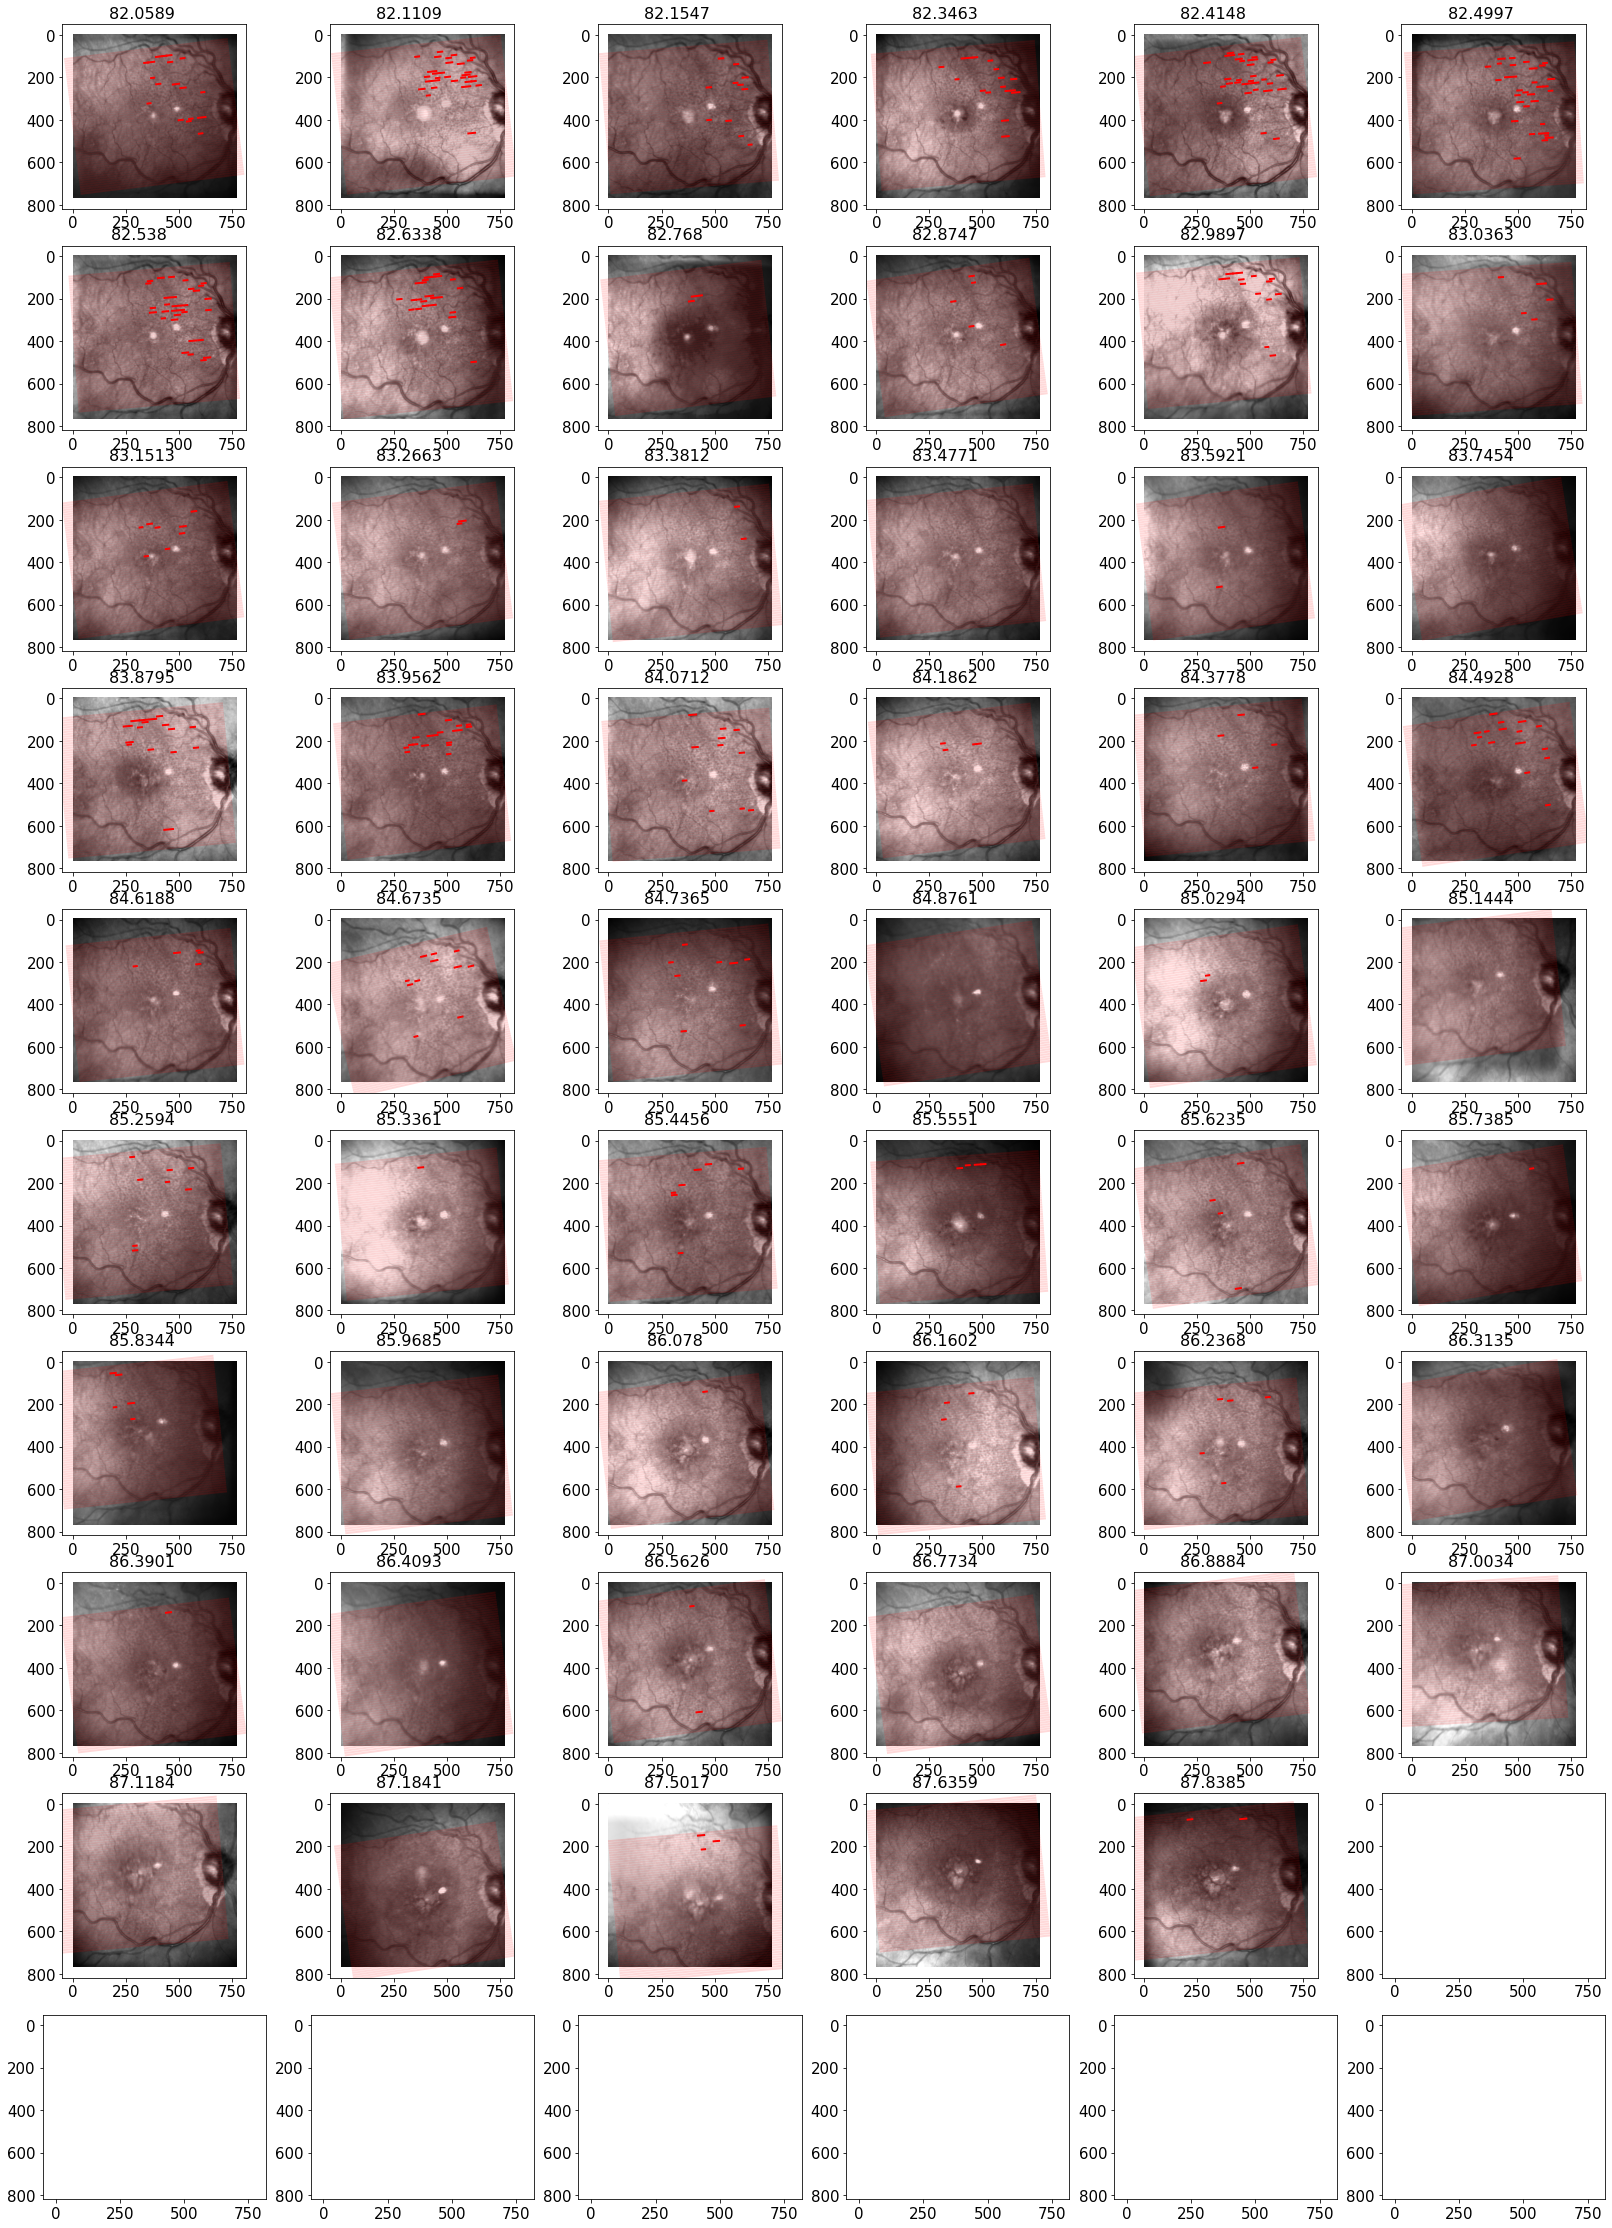

In [14]:
irpaths_R = enface_library.get_irpaths(vis,grps_R)
fig,axs = plt.subplots(10,6,figsize=[28,40])
scan_height=496
scan_width=768
plt.setp(axs,xlim=(-50,scan_width+50),ylim=(scan_width+50,-50))
enface_library.draw_ir(vis,irpaths_R,grps_R,scan_height,scan_width,fig=fig,affine_transforms=None)